In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [ ]:
% alpha = 0.00001; w_thresh = 20; leak = 0.2; fire_thresh = 10; wu_thresh =
% 100; achieved max 72% accuracy
% alpha = 0.00001; w_thresh = 20; leak = 0.5; fire_thresh = 10; wu_thresh =
% 100; got 76% accuracy

clc
close all
clear all

load("train_data_015.mat");
 W1 = rand(784,3);
j = 1;
A = zeros(12665,3);
count_zero =0;
ep = 1000;

% hyperparameters
alpha = 0.00001;
w_thresh = 20;     % if weight>w_thresh, weight = w_thresh
leak = 0.5;        % leaking in neuron   % 0.2
fire_thresh = 10;   % if the output from the neuron is greater than fire_threshold, it fires
wu_thresh = 100;   % if output from the neuron > wu_thresh, weight is updated

%parameter
% W1 = (w_thresh-0).*rand(784,3) + 0;

for k = 1:ep
    EPC=['Epoch#',num2str(k)];
    disp(EPC);
    
    acc = 0;    % counts accuracy in each epoch

for i = 1:100         % 10 training examples taken

    % input x weight
    AA = train_data_015(i,2:785);
    A_m = AA * W1;

    A(i,1) = A(i,1) + A_m(1,1);      % A is neuron output
    A(i,2) = A(i,2) + A_m(1,2);
    A(i,3) = A(i,3) + A_m(1,3);


if A(i,1)>wu_thresh                  % if output from the neuron > wu_thresh, weight is updated
    for kk = 1:784
         W1(kk,1) = W1(kk,1) + alpha.*A(i,1);
    end
else
     for kk = 1:784
         W1(kk,1) = W1(kk,1) - alpha.*A(i,1);
     end
end

if A(i,2)>wu_thresh                % if output from the neuron > wu_thresh, weight is updated
for kk=1:784
    W1(kk,2) = W1(kk,2) + alpha.*A(i,2);
end
else
    for kk=1:784
       W1(kk,2) = W1(kk,2) - alpha.*A(i,2);
    end
end

if A(i,3)>wu_thresh              % if output from the neuron > wu_thresh, weight is updated
for kk=1:784
    W1(kk,3) = W1(kk,3) + alpha.*A(i,3);
end
else
    for kk=1:784
    W1(kk,3) = W1(kk,3) - alpha.*A(i,3);
    end
end


 for j=1:784
     for nn=1:3
         if W1(j,nn)>w_thresh        % if weight>w_thresh, weight = w_thresh
             W1(j,nn) = w_thresh;
         end
         if W1(j,nn)<0
             W1(j,nn) = 0;
         end
     end
 end
 

for j = 1:3
if A(i,j)>=fire_thresh         % if the output from the neuron is greater than fire_threshold, it fires
    A(i,:) = 0;
else
    A(i,j) = A(i,j) - leak;
end
end

[val,predict(i)] = max(A(i,:));  % predict among three output neurons, which one has maximum value

if predict(i) == 1          % if 1st output neuron is maximum, it is predicted as 0
    predict(i) = 0;
elseif predict(i) == 2      % if 2nd output neuron is maximum, it is predicted as 1
    predict(i) = 1;
else
    predict(i) = 5;          % if 3rd output neuron is maximum, it is predicted as 5
end

 predict_store(i,1) = predict(i);


if (predict_store(i,1))==train_data_015(i,1)  % if predicted value matches with original value, increase acc
    acc = (acc + 1);
end

end
acc_plot(k) = (acc/100)*100;       % calculate accuracy in percentage

count_correct = 0;                % counts how many digits are predicted correctly

for i = 1:100
    comp(i,1) = train_data_015(i,1);  % 1st column of comp has the original digits 
    comp(i,2) = predict_store(i,1);   % 2nd column of comp has the predicted digits 

    if comp(i,1) == comp(i,2)    % if predicted and original match, increase the count of correct digit
            count_correct = count_correct + 1;  
    end
end

    count_correct_store(k,1) = count_correct; % holds the #correct digit in each epoch

    if acc_plot(k) >= 70    % if the accuracy>=70, save the predicted and original digits separately
        comp_s = comp;
    end

end
figure(1)
plot(1:k,acc_plot,"b-o")

In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [19]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 5))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 5))

In [20]:
X_train = X_train/255.0

In [21]:
train_filter_0 = np.where(Y_train == 0)
test_filter_0 = np.where(Y_test == 0)

X_train_filter_0 , Y_train_filter_0 = X_train[train_filter_0],Y_train[train_filter_0]
X_test_filter_0 , Y_test_filter_0 = X_test[test_filter_0] , Y_test[test_filter_0]

In [22]:
train_filter_1 = np.where(Y_train == 1)
test_filter_1 = np.where(Y_test == 1)

X_train_filter_1 , Y_train_filter_1 = X_train[train_filter_1],Y_train[train_filter_1]
X_test_filter_1 , Y_test_filter_1 = X_test[test_filter_1] , Y_test[test_filter_1]

In [23]:
train_filter_5 = np.where(Y_train == 5)
test_filter_5 = np.where(Y_test == 5)

X_train_filter_5 , Y_train_filter_5 = X_train[train_filter_5],Y_train[train_filter_5]
X_test_filter_5 , Y_test_filter_5 = X_test[test_filter_5] , Y_test[test_filter_5]

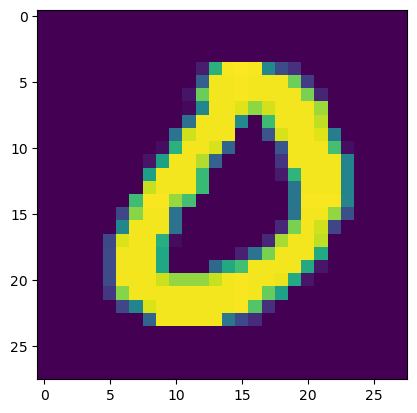

In [24]:
plt.imshow(X_train_filter_0[34])

In [25]:
flattenImage = []
Y_train_filter = []

for image_ in X_train_filter_0[:34]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(0)

for image_ in X_train_filter_1[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(1)

for image_ in X_train_filter_5[:33]:
    image_ = image_.flatten()
    flattenImage.append(image_)
    Y_train_filter.append(5)

In [26]:
flattenImage, Y_train_filter = shuffle(flattenImage, Y_train_filter, random_state=0)

In [27]:
len(flattenImage)

100

Epoch# 1
34
Epoch# 2
34
Epoch# 3
34
Epoch# 4
34
Epoch# 5
34
Epoch# 6
34
Epoch# 7
34
Epoch# 8
34
Epoch# 9
34
Epoch# 10
34
Epoch# 11
34
Epoch# 12
34
Epoch# 13
34
Epoch# 14
34
Epoch# 15
34
Epoch# 16
34
Epoch# 17
34
Epoch# 18
36
Epoch# 19
37
Epoch# 20
37
Epoch# 21
41
Epoch# 22
37
Epoch# 23
40
Epoch# 24
40
Epoch# 25
41
Epoch# 26
42
Epoch# 27
42
Epoch# 28
44
Epoch# 29
39
Epoch# 30
45
Epoch# 31
42
Epoch# 32
45
Epoch# 33
39
Epoch# 34
44
Epoch# 35
37
Epoch# 36
43
Epoch# 37
40
Epoch# 38
41
Epoch# 39
39
Epoch# 40
43
Epoch# 41
42
Epoch# 42
35
Epoch# 43
38
Epoch# 44
41
Epoch# 45
40
Epoch# 46
36
Epoch# 47
37
Epoch# 48
42
Epoch# 49
39
Epoch# 50
35
Epoch# 51
37
Epoch# 52
42
Epoch# 53
41
Epoch# 54
38
Epoch# 55
40
Epoch# 56
43
Epoch# 57
35
Epoch# 58
40
Epoch# 59
43
Epoch# 60
44
Epoch# 61
45
Epoch# 62
37
Epoch# 63
41
Epoch# 64
41
Epoch# 65
44
Epoch# 66
42
Epoch# 67
43
Epoch# 68
43
Epoch# 69
44
Epoch# 70
43
Epoch# 71
42
Epoch# 72
43
Epoch# 73
40
Epoch# 74
41
Epoch# 75
39
Epoch# 76
41
Epoch# 77
41
Epoch# 7

28
Epoch# 645
28
Epoch# 646
29
Epoch# 647
30
Epoch# 648
31
Epoch# 649
26
Epoch# 650
29
Epoch# 651
28
Epoch# 652
28
Epoch# 653
26
Epoch# 654
30
Epoch# 655
30
Epoch# 656
31
Epoch# 657
28
Epoch# 658
27
Epoch# 659
27
Epoch# 660
30
Epoch# 661
28
Epoch# 662
29
Epoch# 663
29
Epoch# 664
29
Epoch# 665
30
Epoch# 666
29
Epoch# 667
27
Epoch# 668
28
Epoch# 669
31
Epoch# 670
30
Epoch# 671
30
Epoch# 672
25
Epoch# 673
26
Epoch# 674
29
Epoch# 675
30
Epoch# 676
29
Epoch# 677
29
Epoch# 678
28
Epoch# 679
30
Epoch# 680
31
Epoch# 681
30
Epoch# 682
29
Epoch# 683
28
Epoch# 684
30
Epoch# 685
33
Epoch# 686
32
Epoch# 687
27
Epoch# 688
32
Epoch# 689
28
Epoch# 690
29
Epoch# 691
32
Epoch# 692
33
Epoch# 693
31
Epoch# 694
30
Epoch# 695
33
Epoch# 696
28
Epoch# 697
28
Epoch# 698
32
Epoch# 699
28
Epoch# 700
29
Epoch# 701
34
Epoch# 702
27
Epoch# 703
28
Epoch# 704
30
Epoch# 705
30
Epoch# 706
30
Epoch# 707
28
Epoch# 708
29
Epoch# 709
29
Epoch# 710
28
Epoch# 711
28
Epoch# 712
28
Epoch# 713
25
Epoch# 714
29
Epoch# 715
29
Epo

33
Epoch# 1239
35
Epoch# 1240
35
Epoch# 1241
31
Epoch# 1242
35
Epoch# 1243
31
Epoch# 1244
34
Epoch# 1245
27
Epoch# 1246
32
Epoch# 1247
36
Epoch# 1248
32
Epoch# 1249
32
Epoch# 1250
31
Epoch# 1251
30
Epoch# 1252
34
Epoch# 1253
30
Epoch# 1254
33
Epoch# 1255
33
Epoch# 1256
32
Epoch# 1257
32
Epoch# 1258
31
Epoch# 1259
34
Epoch# 1260
31
Epoch# 1261
33
Epoch# 1262
35
Epoch# 1263
34
Epoch# 1264
29
Epoch# 1265
37
Epoch# 1266
29
Epoch# 1267
33
Epoch# 1268
34
Epoch# 1269
30
Epoch# 1270
34
Epoch# 1271
33
Epoch# 1272
34
Epoch# 1273
34
Epoch# 1274
35
Epoch# 1275
32
Epoch# 1276
34
Epoch# 1277
32
Epoch# 1278
34
Epoch# 1279
35
Epoch# 1280
33
Epoch# 1281
37
Epoch# 1282
31
Epoch# 1283
33
Epoch# 1284
32
Epoch# 1285
33
Epoch# 1286
31
Epoch# 1287
35
Epoch# 1288
34
Epoch# 1289
34
Epoch# 1290
32
Epoch# 1291
31
Epoch# 1292
30
Epoch# 1293
35
Epoch# 1294
34
Epoch# 1295
34
Epoch# 1296
30
Epoch# 1297
31
Epoch# 1298
33
Epoch# 1299
35
Epoch# 1300
32
Epoch# 1301
31
Epoch# 1302
36
Epoch# 1303
33
Epoch# 1304
33
Epoch# 

29
Epoch# 1833
30
Epoch# 1834
34
Epoch# 1835
36
Epoch# 1836
33
Epoch# 1837
28
Epoch# 1838
30
Epoch# 1839
35
Epoch# 1840
33
Epoch# 1841
37
Epoch# 1842
30
Epoch# 1843
33
Epoch# 1844
33
Epoch# 1845
32
Epoch# 1846
33
Epoch# 1847
36
Epoch# 1848
32
Epoch# 1849
34
Epoch# 1850
31
Epoch# 1851
33
Epoch# 1852
30
Epoch# 1853
29
Epoch# 1854
39
Epoch# 1855
36
Epoch# 1856
33
Epoch# 1857
33
Epoch# 1858
32
Epoch# 1859
35
Epoch# 1860
33
Epoch# 1861
34
Epoch# 1862
33
Epoch# 1863
35
Epoch# 1864
34
Epoch# 1865
32
Epoch# 1866
33
Epoch# 1867
31
Epoch# 1868
34
Epoch# 1869
35
Epoch# 1870
32
Epoch# 1871
30
Epoch# 1872
32
Epoch# 1873
30
Epoch# 1874
34
Epoch# 1875
31
Epoch# 1876
32
Epoch# 1877
31
Epoch# 1878
32
Epoch# 1879
32
Epoch# 1880
33
Epoch# 1881
31
Epoch# 1882
33
Epoch# 1883
34
Epoch# 1884
36
Epoch# 1885
30
Epoch# 1886
31
Epoch# 1887
31
Epoch# 1888
35
Epoch# 1889
37
Epoch# 1890
36
Epoch# 1891
32
Epoch# 1892
31
Epoch# 1893
32
Epoch# 1894
33
Epoch# 1895
33
Epoch# 1896
36
Epoch# 1897
29
Epoch# 1898
30
Epoch# 

35
Epoch# 2427
35
Epoch# 2428
38
Epoch# 2429
31
Epoch# 2430
38
Epoch# 2431
38
Epoch# 2432
36
Epoch# 2433
33
Epoch# 2434
35
Epoch# 2435
33
Epoch# 2436
38
Epoch# 2437
36
Epoch# 2438
36
Epoch# 2439
36
Epoch# 2440
34
Epoch# 2441
32
Epoch# 2442
38
Epoch# 2443
35
Epoch# 2444
37
Epoch# 2445
32
Epoch# 2446
37
Epoch# 2447
33
Epoch# 2448
41
Epoch# 2449
34
Epoch# 2450
34
Epoch# 2451
32
Epoch# 2452
37
Epoch# 2453
34
Epoch# 2454
35
Epoch# 2455
35
Epoch# 2456
35
Epoch# 2457
33
Epoch# 2458
34
Epoch# 2459
32
Epoch# 2460
36
Epoch# 2461
35
Epoch# 2462
37
Epoch# 2463
38
Epoch# 2464
32
Epoch# 2465
32
Epoch# 2466
40
Epoch# 2467
33
Epoch# 2468
37
Epoch# 2469
37
Epoch# 2470
33
Epoch# 2471
33
Epoch# 2472
39
Epoch# 2473
34
Epoch# 2474
35
Epoch# 2475
34
Epoch# 2476
36
Epoch# 2477
32
Epoch# 2478
37
Epoch# 2479
34
Epoch# 2480
34
Epoch# 2481
38
Epoch# 2482
34
Epoch# 2483
34
Epoch# 2484
37
Epoch# 2485
33
Epoch# 2486
36
Epoch# 2487
36
Epoch# 2488
36
Epoch# 2489
33
Epoch# 2490
38
Epoch# 2491
34
Epoch# 2492
34
Epoch# 

32
Epoch# 3020
33
Epoch# 3021
35
Epoch# 3022
34
Epoch# 3023
32
Epoch# 3024
31
Epoch# 3025
33
Epoch# 3026
34
Epoch# 3027
33
Epoch# 3028
30
Epoch# 3029
32
Epoch# 3030
31
Epoch# 3031
33
Epoch# 3032
35
Epoch# 3033
31
Epoch# 3034
32
Epoch# 3035
28
Epoch# 3036
34
Epoch# 3037
29
Epoch# 3038
36
Epoch# 3039
37
Epoch# 3040
33
Epoch# 3041
31
Epoch# 3042
37
Epoch# 3043
33
Epoch# 3044
31
Epoch# 3045
32
Epoch# 3046
33
Epoch# 3047
33
Epoch# 3048
33
Epoch# 3049
32
Epoch# 3050
34
Epoch# 3051
35
Epoch# 3052
31
Epoch# 3053
34
Epoch# 3054
37
Epoch# 3055
32
Epoch# 3056
32
Epoch# 3057
31
Epoch# 3058
34
Epoch# 3059
33
Epoch# 3060
34
Epoch# 3061
31
Epoch# 3062
32
Epoch# 3063
32
Epoch# 3064
35
Epoch# 3065
30
Epoch# 3066
36
Epoch# 3067
32
Epoch# 3068
32
Epoch# 3069
35
Epoch# 3070
38
Epoch# 3071
32
Epoch# 3072
36
Epoch# 3073
29
Epoch# 3074
38
Epoch# 3075
32
Epoch# 3076
34
Epoch# 3077
32
Epoch# 3078
30
Epoch# 3079
32
Epoch# 3080
35
Epoch# 3081
33
Epoch# 3082
30
Epoch# 3083
30
Epoch# 3084
42
Epoch# 3085
35
Epoch# 

35
Epoch# 3611
39
Epoch# 3612
38
Epoch# 3613
35
Epoch# 3614
37
Epoch# 3615
40
Epoch# 3616
34
Epoch# 3617
36
Epoch# 3618
36
Epoch# 3619
34
Epoch# 3620
37
Epoch# 3621
36
Epoch# 3622
35
Epoch# 3623
35
Epoch# 3624
34
Epoch# 3625
37
Epoch# 3626
39
Epoch# 3627
37
Epoch# 3628
35
Epoch# 3629
34
Epoch# 3630
42
Epoch# 3631
39
Epoch# 3632
36
Epoch# 3633
32
Epoch# 3634
34
Epoch# 3635
41
Epoch# 3636
35
Epoch# 3637
38
Epoch# 3638
35
Epoch# 3639
38
Epoch# 3640
36
Epoch# 3641
38
Epoch# 3642
43
Epoch# 3643
37
Epoch# 3644
33
Epoch# 3645
36
Epoch# 3646
41
Epoch# 3647
38
Epoch# 3648
36
Epoch# 3649
33
Epoch# 3650
36
Epoch# 3651
38
Epoch# 3652
36
Epoch# 3653
35
Epoch# 3654
37
Epoch# 3655
35
Epoch# 3656
34
Epoch# 3657
38
Epoch# 3658
34
Epoch# 3659
37
Epoch# 3660
38
Epoch# 3661
38
Epoch# 3662
37
Epoch# 3663
36
Epoch# 3664
32
Epoch# 3665
38
Epoch# 3666
35
Epoch# 3667
36
Epoch# 3668
32
Epoch# 3669
33
Epoch# 3670
37
Epoch# 3671
40
Epoch# 3672
40
Epoch# 3673
38
Epoch# 3674
33
Epoch# 3675
37
Epoch# 3676
37
Epoch# 

27
Epoch# 4205
28
Epoch# 4206
27
Epoch# 4207
28
Epoch# 4208
32
Epoch# 4209
30
Epoch# 4210
28
Epoch# 4211
28
Epoch# 4212
26
Epoch# 4213
30
Epoch# 4214
30
Epoch# 4215
31
Epoch# 4216
30
Epoch# 4217
27
Epoch# 4218
27
Epoch# 4219
26
Epoch# 4220
27
Epoch# 4221
28
Epoch# 4222
28
Epoch# 4223
29
Epoch# 4224
27
Epoch# 4225
30
Epoch# 4226
27
Epoch# 4227
29
Epoch# 4228
27
Epoch# 4229
27
Epoch# 4230
31
Epoch# 4231
28
Epoch# 4232
28
Epoch# 4233
30
Epoch# 4234
27
Epoch# 4235
28
Epoch# 4236
32
Epoch# 4237
28
Epoch# 4238
30
Epoch# 4239
26
Epoch# 4240
31
Epoch# 4241
28
Epoch# 4242
30
Epoch# 4243
30
Epoch# 4244
27
Epoch# 4245
31
Epoch# 4246
27
Epoch# 4247
27
Epoch# 4248
33
Epoch# 4249
31
Epoch# 4250
27
Epoch# 4251
27
Epoch# 4252
27
Epoch# 4253
26
Epoch# 4254
27
Epoch# 4255
29
Epoch# 4256
32
Epoch# 4257
26
Epoch# 4258
25
Epoch# 4259
25
Epoch# 4260
27
Epoch# 4261
25
Epoch# 4262
27
Epoch# 4263
28
Epoch# 4264
28
Epoch# 4265
28
Epoch# 4266
26
Epoch# 4267
27
Epoch# 4268
27
Epoch# 4269
30
Epoch# 4270
29
Epoch# 

30
Epoch# 4799
27
Epoch# 4800
27
Epoch# 4801
28
Epoch# 4802
27
Epoch# 4803
30
Epoch# 4804
29
Epoch# 4805
28
Epoch# 4806
30
Epoch# 4807
25
Epoch# 4808
29
Epoch# 4809
26
Epoch# 4810
30
Epoch# 4811
32
Epoch# 4812
28
Epoch# 4813
30
Epoch# 4814
27
Epoch# 4815
25
Epoch# 4816
29
Epoch# 4817
29
Epoch# 4818
31
Epoch# 4819
26
Epoch# 4820
27
Epoch# 4821
26
Epoch# 4822
31
Epoch# 4823
30
Epoch# 4824
29
Epoch# 4825
29
Epoch# 4826
29
Epoch# 4827
27
Epoch# 4828
26
Epoch# 4829
28
Epoch# 4830
28
Epoch# 4831
24
Epoch# 4832
28
Epoch# 4833
28
Epoch# 4834
32
Epoch# 4835
27
Epoch# 4836
26
Epoch# 4837
27
Epoch# 4838
30
Epoch# 4839
29
Epoch# 4840
28
Epoch# 4841
31
Epoch# 4842
28
Epoch# 4843
23
Epoch# 4844
28
Epoch# 4845
26
Epoch# 4846
28
Epoch# 4847
27
Epoch# 4848
29
Epoch# 4849
27
Epoch# 4850
28
Epoch# 4851
29
Epoch# 4852
32
Epoch# 4853
34
Epoch# 4854
27
Epoch# 4855
27
Epoch# 4856
30
Epoch# 4857
31
Epoch# 4858
29
Epoch# 4859
27
Epoch# 4860
30
Epoch# 4861
33
Epoch# 4862
27
Epoch# 4863
25
Epoch# 4864
30
Epoch# 

28
Epoch# 5393
33
Epoch# 5394
34
Epoch# 5395
27
Epoch# 5396
31
Epoch# 5397
35
Epoch# 5398
30
Epoch# 5399
33
Epoch# 5400
29
Epoch# 5401
33
Epoch# 5402
34
Epoch# 5403
28
Epoch# 5404
34
Epoch# 5405
31
Epoch# 5406
32
Epoch# 5407
28
Epoch# 5408
30
Epoch# 5409
39
Epoch# 5410
31
Epoch# 5411
29
Epoch# 5412
30
Epoch# 5413
33
Epoch# 5414
36
Epoch# 5415
28
Epoch# 5416
31
Epoch# 5417
34
Epoch# 5418
29
Epoch# 5419
30
Epoch# 5420
31
Epoch# 5421
34
Epoch# 5422
33
Epoch# 5423
28
Epoch# 5424
33
Epoch# 5425
30
Epoch# 5426
34
Epoch# 5427
29
Epoch# 5428
29
Epoch# 5429
34
Epoch# 5430
30
Epoch# 5431
29
Epoch# 5432
29
Epoch# 5433
32
Epoch# 5434
34
Epoch# 5435
26
Epoch# 5436
30
Epoch# 5437
34
Epoch# 5438
32
Epoch# 5439
33
Epoch# 5440
30
Epoch# 5441
34
Epoch# 5442
35
Epoch# 5443
27
Epoch# 5444
32
Epoch# 5445
31
Epoch# 5446
34
Epoch# 5447
31
Epoch# 5448
29
Epoch# 5449
34
Epoch# 5450
30
Epoch# 5451
33
Epoch# 5452
33
Epoch# 5453
31
Epoch# 5454
36
Epoch# 5455
26
Epoch# 5456
32
Epoch# 5457
33
Epoch# 5458
32
Epoch# 

35
Epoch# 5985
38
Epoch# 5986
36
Epoch# 5987
31
Epoch# 5988
35
Epoch# 5989
41
Epoch# 5990
35
Epoch# 5991
33
Epoch# 5992
31
Epoch# 5993
33
Epoch# 5994
39
Epoch# 5995
30
Epoch# 5996
33
Epoch# 5997
38
Epoch# 5998
35
Epoch# 5999
36
Epoch# 6000
33
Epoch# 6001
38
Epoch# 6002
35
Epoch# 6003
32
Epoch# 6004
38
Epoch# 6005
37
Epoch# 6006
36
Epoch# 6007
30
Epoch# 6008
32
Epoch# 6009
40
Epoch# 6010
36
Epoch# 6011
33
Epoch# 6012
29
Epoch# 6013
35
Epoch# 6014
40
Epoch# 6015
34
Epoch# 6016
31
Epoch# 6017
38
Epoch# 6018
36
Epoch# 6019
37
Epoch# 6020
32
Epoch# 6021
40
Epoch# 6022
34
Epoch# 6023
32
Epoch# 6024
38
Epoch# 6025
37
Epoch# 6026
34
Epoch# 6027
31
Epoch# 6028
31
Epoch# 6029
42
Epoch# 6030
35
Epoch# 6031
31
Epoch# 6032
33
Epoch# 6033
38
Epoch# 6034
41
Epoch# 6035
34
Epoch# 6036
33
Epoch# 6037
36
Epoch# 6038
35
Epoch# 6039
37
Epoch# 6040
34
Epoch# 6041
39
Epoch# 6042
33
Epoch# 6043
30
Epoch# 6044
34
Epoch# 6045
40
Epoch# 6046
36
Epoch# 6047
32
Epoch# 6048
33
Epoch# 6049
42
Epoch# 6050
34
Epoch# 

38
Epoch# 6579
37
Epoch# 6580
31
Epoch# 6581
35
Epoch# 6582
34
Epoch# 6583
37
Epoch# 6584
34
Epoch# 6585
36
Epoch# 6586
36
Epoch# 6587
39
Epoch# 6588
33
Epoch# 6589
36
Epoch# 6590
37
Epoch# 6591
33
Epoch# 6592
33
Epoch# 6593
40
Epoch# 6594
35
Epoch# 6595
34
Epoch# 6596
34
Epoch# 6597
37
Epoch# 6598
40
Epoch# 6599
37
Epoch# 6600
31
Epoch# 6601
36
Epoch# 6602
38
Epoch# 6603
34
Epoch# 6604
31
Epoch# 6605
39
Epoch# 6606
34
Epoch# 6607
36
Epoch# 6608
36
Epoch# 6609
37
Epoch# 6610
35
Epoch# 6611
39
Epoch# 6612
32
Epoch# 6613
35
Epoch# 6614
39
Epoch# 6615
36
Epoch# 6616
33
Epoch# 6617
36
Epoch# 6618
37
Epoch# 6619
35
Epoch# 6620
33
Epoch# 6621
35
Epoch# 6622
35
Epoch# 6623
37
Epoch# 6624
30
Epoch# 6625
38
Epoch# 6626
38
Epoch# 6627
34
Epoch# 6628
34
Epoch# 6629
38
Epoch# 6630
34
Epoch# 6631
36
Epoch# 6632
38
Epoch# 6633
37
Epoch# 6634
34
Epoch# 6635
37
Epoch# 6636
33
Epoch# 6637
34
Epoch# 6638
39
Epoch# 6639
37
Epoch# 6640
33
Epoch# 6641
37
Epoch# 6642
36
Epoch# 6643
37
Epoch# 6644
36
Epoch# 

35
Epoch# 7173
32
Epoch# 7174
38
Epoch# 7175
38
Epoch# 7176
30
Epoch# 7177
38
Epoch# 7178
41
Epoch# 7179
40
Epoch# 7180
35
Epoch# 7181
35
Epoch# 7182
35
Epoch# 7183
36
Epoch# 7184
37
Epoch# 7185
34
Epoch# 7186
37
Epoch# 7187
34
Epoch# 7188
32
Epoch# 7189
37
Epoch# 7190
38
Epoch# 7191
36
Epoch# 7192
32
Epoch# 7193
39
Epoch# 7194
38
Epoch# 7195
35
Epoch# 7196
30
Epoch# 7197
38
Epoch# 7198
39
Epoch# 7199
38
Epoch# 7200
30
Epoch# 7201
35
Epoch# 7202
36
Epoch# 7203
35
Epoch# 7204
38
Epoch# 7205
34
Epoch# 7206
32
Epoch# 7207
36
Epoch# 7208
37
Epoch# 7209
38
Epoch# 7210
33
Epoch# 7211
34
Epoch# 7212
40
Epoch# 7213
35
Epoch# 7214
34
Epoch# 7215
36
Epoch# 7216
34
Epoch# 7217
39
Epoch# 7218
36
Epoch# 7219
36
Epoch# 7220
31
Epoch# 7221
38
Epoch# 7222
34
Epoch# 7223
39
Epoch# 7224
32
Epoch# 7225
36
Epoch# 7226
38
Epoch# 7227
34
Epoch# 7228
32
Epoch# 7229
35
Epoch# 7230
33
Epoch# 7231
36
Epoch# 7232
37
Epoch# 7233
33
Epoch# 7234
34
Epoch# 7235
38
Epoch# 7236
36
Epoch# 7237
34
Epoch# 7238
34
Epoch# 

40
Epoch# 7767
35
Epoch# 7768
35
Epoch# 7769
35
Epoch# 7770
36
Epoch# 7771
36
Epoch# 7772
36
Epoch# 7773
36
Epoch# 7774
36
Epoch# 7775
34
Epoch# 7776
36
Epoch# 7777
39
Epoch# 7778
36
Epoch# 7779
34
Epoch# 7780
35
Epoch# 7781
34
Epoch# 7782
41
Epoch# 7783
33
Epoch# 7784
36
Epoch# 7785
35
Epoch# 7786
35
Epoch# 7787
34
Epoch# 7788
32
Epoch# 7789
37
Epoch# 7790
36
Epoch# 7791
40
Epoch# 7792
33
Epoch# 7793
35
Epoch# 7794
38
Epoch# 7795
35
Epoch# 7796
38
Epoch# 7797
37
Epoch# 7798
35
Epoch# 7799
37
Epoch# 7800
34
Epoch# 7801
34
Epoch# 7802
36
Epoch# 7803
38
Epoch# 7804
36
Epoch# 7805
36
Epoch# 7806
38
Epoch# 7807
33
Epoch# 7808
37
Epoch# 7809
36
Epoch# 7810
37
Epoch# 7811
33
Epoch# 7812
35
Epoch# 7813
34
Epoch# 7814
39
Epoch# 7815
39
Epoch# 7816
32
Epoch# 7817
39
Epoch# 7818
34
Epoch# 7819
37
Epoch# 7820
36
Epoch# 7821
35
Epoch# 7822
38
Epoch# 7823
32
Epoch# 7824
33
Epoch# 7825
38
Epoch# 7826
37
Epoch# 7827
36
Epoch# 7828
34
Epoch# 7829
39
Epoch# 7830
39
Epoch# 7831
34
Epoch# 7832
36
Epoch# 

38
Epoch# 8359
39
Epoch# 8360
38
Epoch# 8361
33
Epoch# 8362
32
Epoch# 8363
36
Epoch# 8364
41
Epoch# 8365
35
Epoch# 8366
33
Epoch# 8367
37
Epoch# 8368
37
Epoch# 8369
37
Epoch# 8370
38
Epoch# 8371
35
Epoch# 8372
36
Epoch# 8373
37
Epoch# 8374
37
Epoch# 8375
35
Epoch# 8376
34
Epoch# 8377
33
Epoch# 8378
34
Epoch# 8379
37
Epoch# 8380
34
Epoch# 8381
36
Epoch# 8382
37
Epoch# 8383
37
Epoch# 8384
40
Epoch# 8385
32
Epoch# 8386
35
Epoch# 8387
37
Epoch# 8388
38
Epoch# 8389
34
Epoch# 8390
35
Epoch# 8391
39
Epoch# 8392
36
Epoch# 8393
35
Epoch# 8394
39
Epoch# 8395
34
Epoch# 8396
35
Epoch# 8397
36
Epoch# 8398
35
Epoch# 8399
40
Epoch# 8400
34
Epoch# 8401
34
Epoch# 8402
37
Epoch# 8403
39
Epoch# 8404
34
Epoch# 8405
32
Epoch# 8406
38
Epoch# 8407
36
Epoch# 8408
37
Epoch# 8409
36
Epoch# 8410
33
Epoch# 8411
38
Epoch# 8412
40
Epoch# 8413
35
Epoch# 8414
40
Epoch# 8415
34
Epoch# 8416
36
Epoch# 8417
36
Epoch# 8418
36
Epoch# 8419
41
Epoch# 8420
34
Epoch# 8421
33
Epoch# 8422
34
Epoch# 8423
39
Epoch# 8424
39
Epoch# 

31
Epoch# 8953
35
Epoch# 8954
38
Epoch# 8955
32
Epoch# 8956
35
Epoch# 8957
33
Epoch# 8958
34
Epoch# 8959
37
Epoch# 8960
40
Epoch# 8961
35
Epoch# 8962
35
Epoch# 8963
35
Epoch# 8964
33
Epoch# 8965
33
Epoch# 8966
37
Epoch# 8967
33
Epoch# 8968
34
Epoch# 8969
38
Epoch# 8970
37
Epoch# 8971
37
Epoch# 8972
36
Epoch# 8973
34
Epoch# 8974
37
Epoch# 8975
36
Epoch# 8976
34
Epoch# 8977
32
Epoch# 8978
37
Epoch# 8979
38
Epoch# 8980
34
Epoch# 8981
33
Epoch# 8982
38
Epoch# 8983
33
Epoch# 8984
38
Epoch# 8985
37
Epoch# 8986
36
Epoch# 8987
35
Epoch# 8988
35
Epoch# 8989
35
Epoch# 8990
35
Epoch# 8991
41
Epoch# 8992
34
Epoch# 8993
34
Epoch# 8994
40
Epoch# 8995
35
Epoch# 8996
36
Epoch# 8997
35
Epoch# 8998
36
Epoch# 8999
38
Epoch# 9000
33
Epoch# 9001
35
Epoch# 9002
38
Epoch# 9003
37
Epoch# 9004
34
Epoch# 9005
35
Epoch# 9006
39
Epoch# 9007
34
Epoch# 9008
34
Epoch# 9009
37
Epoch# 9010
36
Epoch# 9011
38
Epoch# 9012
32
Epoch# 9013
32
Epoch# 9014
39
Epoch# 9015
35
Epoch# 9016
36
Epoch# 9017
41
Epoch# 9018
35
Epoch# 

38
Epoch# 9547
36
Epoch# 9548
37
Epoch# 9549
40
Epoch# 9550
37
Epoch# 9551
39
Epoch# 9552
34
Epoch# 9553
36
Epoch# 9554
41
Epoch# 9555
38
Epoch# 9556
34
Epoch# 9557
38
Epoch# 9558
36
Epoch# 9559
41
Epoch# 9560
33
Epoch# 9561
30
Epoch# 9562
33
Epoch# 9563
41
Epoch# 9564
38
Epoch# 9565
34
Epoch# 9566
37
Epoch# 9567
39
Epoch# 9568
36
Epoch# 9569
40
Epoch# 9570
35
Epoch# 9571
39
Epoch# 9572
35
Epoch# 9573
39
Epoch# 9574
39
Epoch# 9575
37
Epoch# 9576
37
Epoch# 9577
37
Epoch# 9578
37
Epoch# 9579
40
Epoch# 9580
34
Epoch# 9581
35
Epoch# 9582
33
Epoch# 9583
38
Epoch# 9584
40
Epoch# 9585
36
Epoch# 9586
34
Epoch# 9587
37
Epoch# 9588
39
Epoch# 9589
40
Epoch# 9590
34
Epoch# 9591
37
Epoch# 9592
35
Epoch# 9593
40
Epoch# 9594
37
Epoch# 9595
35
Epoch# 9596
35
Epoch# 9597
37
Epoch# 9598
36
Epoch# 9599
41
Epoch# 9600
37
Epoch# 9601
37
Epoch# 9602
39
Epoch# 9603
37
Epoch# 9604
39
Epoch# 9605
37
Epoch# 9606
38
Epoch# 9607
39
Epoch# 9608
36
Epoch# 9609
38
Epoch# 9610
33
Epoch# 9611
38
Epoch# 9612
37
Epoch# 

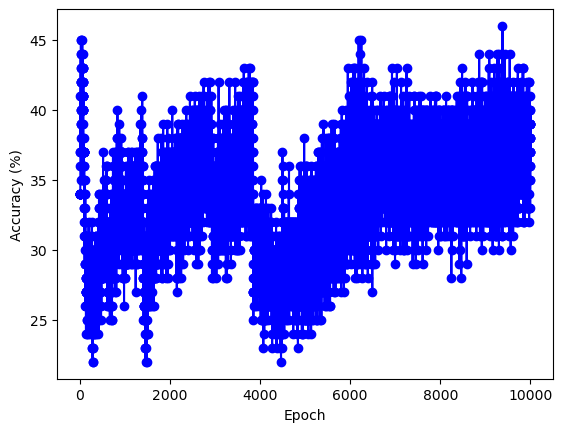

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import random

W1 = np.random.rand(784, 3)
A = np.zeros((99, 3))

# Hyperparameters
alpha = 0.00001
w_thresh = 20
leak = 0.5
fire_thresh = 10
wu_thresh = 100

ep = 10000

acc_plot = []
for k in range(ep):
    print("Epoch#", k+1)
    
    acc = 0

    for i in range(0,99):
        AA = flattenImage[i]
        A_m = np.dot(AA, W1)

        A[i][0] += A_m[0]
        A[i][1] += A_m[1]
        A[i][2] += A_m[2]

        if A[i][0] > wu_thresh:
            W1[:,0] += alpha * A[i][0]
        else:
            W1[:,0] -= alpha * A[i][0]

        if A[i][1] > wu_thresh:
            W1[:,1] += alpha * A[i][1]
        else:
            W1[:,1] -= alpha * A[i][1]

        if A[i][2] > wu_thresh:
            W1[:,2] += alpha * A[i][2]
        else:
            W1[:,2] -= alpha * A[i][2]

        W1[W1 > w_thresh] = w_thresh
        W1[W1 < 0] = 0

        for j in range(3):
            if A[i][j] >= fire_thresh:
                A[i][:] = 0
            else:
                A[i][j] -= leak

        predict = np.argmax(A[i][:])

        if predict == 0:
            predict = 0
        elif predict == 1:
            predict = 1
        else:
            predict = 5

        if predict == Y_train_filter[i]:
            acc += 1

    
    print(acc)
    acc_plot.append((acc / 100) * 100)

    count_correct = 0
    comp = np.zeros((99, 2))

    for i in range(99):
        comp[i, 0] = Y_train_filter[i]
        comp[i, 1] = predict

        if comp[i, 0] == comp[i, 1]:
            count_correct += 1

    count_correct_store = count_correct
#     print(count_correct_store)

    if acc_plot[k] >= 70:
        comp_s = comp

plt.plot(range(1, ep + 1), acc_plot, "b-o")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

In [115]:
dict_ = {0 : [] , 1 : [] , 5 : []}

def calculateResult(X,weight):
    for i in range(0,99):
        AA = X[i]
        A_m = np.dot(AA, weight)
        predict = np.argmax(A_m)
        
        if dict_[Y_train_filter[i]] is []:
            dict_[Y_train_filter[i]] = [predict]
        else:
            dict_[Y_train_filter[i]].append(predict)
    return dict_
        

In [116]:
res = calculateResult(flattenImage , W1)

In [117]:
np.array(np.unique(res[0], return_counts=True)).T

array([[ 0,  7],
       [ 1, 27]])

In [118]:
np.array(np.unique(res[1], return_counts=True)).T

array([[ 0,  4],
       [ 1, 23],
       [ 2,  5]])

In [119]:
np.array(np.unique(res[5], return_counts=True)).T

array([[ 0,  3],
       [ 1, 30]])

In [102]:
res[5]

[0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 2]

In [34]:
W1 = np.random.rand(784, 3)
print(W1)

[[0.93251919 0.11505669 0.70845077]
 [0.40150553 0.06530997 0.17379206]
 [0.03130959 0.61273307 0.56308807]
 ...
 [0.79875509 0.68981764 0.14932617]
 [0.39477582 0.99415501 0.45772103]
 [0.81276706 0.23140633 0.165195  ]]


In [35]:
len(W1[:,0])

784

46 and 19
46 and 20


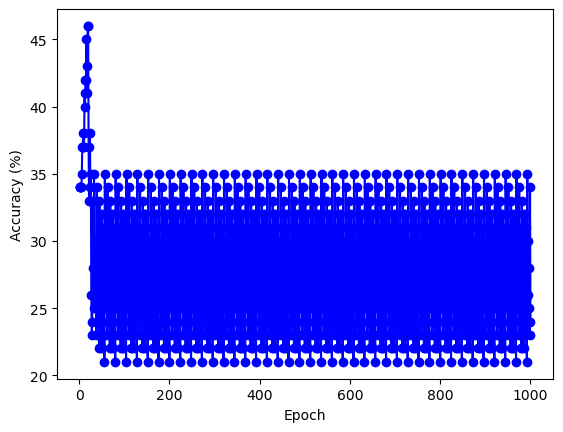

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import random

W1 = np.random.rand(784, 3)
A = np.zeros((1, 3))

# Hyperparameters
alpha = 0.00001
w_thresh = 20
leak = 1.5
fire_thresh = 10
wu_thresh = 100

ep = 1000
result = []

acc_plot = []
for k in range(ep):
    #print("Epoch#", k+1)
    
    acc = 0
    maxPredict = []
    for i in range(99):
        AA = flattenImage[i]
        A_m = np.dot(AA, W1)

        A[0][0] += A_m[0]
        A[0][1] += A_m[1]
        A[0][2] += A_m[2]
        #print(A)

        if A[0][0] > wu_thresh:
            W1[:,0] += alpha * A[0][0]
#             W1[:,0] = (for W1 in W1[:,0] if W1 > [W1 > w_thresh] = w_thresh
        else:
            W1[:,0] -= alpha * A[0][0]

        if A[0][1] > wu_thresh:
            W1[:,1] += alpha * A[0][1]
        else:
            W1[:,1] -= alpha * A[0][1]

        if A[0][2] > wu_thresh:
            W1[:,2] += alpha * A[0][2]
        else:
            W1[:,2] -= alpha * A[0][2]

#         W1[:,0][W1 > w_thresh] = w_thresh
#         #W1[W1 < 0] = 0

        for j in range(3):
            if A[0][j] >= fire_thresh:
                A[0][j] = 0
            else:
                A[0][j] -= alpha * leak

        predict = np.argmax(A[0])
        maxPredict.append(predict)
        if predict == 0:
            predict = 0
        elif predict == 1:
            predict = 1
        else:
            predict = 5

        if predict == Y_train_filter[i]:
            acc += 1
    if acc > 45:
        print(f"{acc} and {k+1}")
    acc_plot.append((acc / 100) * 100)
  
    result.append(maxPredict)
    
    
    count_correct = 0
    comp = np.zeros((99, 2))

#     for i in range(99):
#         comp[i, 0] = Y_train_filter[i]
#         comp[i, 1] = predict

#         if comp[i, 0] == comp[i, 1]:
#             count_correct += 1

#     count_correct_store = count_correct
# #     print(count_correct_store)

#     if acc_plot[k] >= 70:
#         comp_s = comp

plt.plot(range(1, ep + 1), acc_plot, "b-o")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

In [107]:
print(len(result))

1000


In [108]:
np.array(np.unique(result[999], return_counts=True)).T

array([[ 0, 14],
       [ 1, 31],
       [ 2, 54]])

In [41]:
print(W1)

[[1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 ...
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]
 [1.09767956e+41 8.64391863e+40 1.36518851e+41]]


In [38]:
W1 = np.random.rand(784, 3)
print(W1)

[[0.51775807 0.28838241 0.25357684]
 [0.20753677 0.02301373 0.7971274 ]
 [0.70655977 0.48353976 0.81365737]
 ...
 [0.30503524 0.49669396 0.26634476]
 [0.19215299 0.5475887  0.34567723]
 [0.22533084 0.38642227 0.4858023 ]]


In [39]:
print(W1[:,0])

[0.51775807 0.20753677 0.70655977 0.82677746 0.69715016 0.15853472
 0.30963725 0.84525694 0.4087546  0.76619516 0.92964421 0.19176262
 0.88150172 0.98515276 0.42948165 0.15528001 0.18206488 0.79028868
 0.71772632 0.96270447 0.89403653 0.37781022 0.38800827 0.05610478
 0.02868074 0.83693195 0.05076935 0.00264102 0.83806474 0.83095501
 0.96280751 0.57356308 0.73565886 0.32253147 0.84981372 0.50868208
 0.38674855 0.99185195 0.49905996 0.30215016 0.41538962 0.91772943
 0.44620944 0.73421602 0.40854942 0.46102885 0.78993228 0.5959481
 0.28720856 0.65632263 0.5775461  0.47365811 0.96733853 0.56308685
 0.12582864 0.72095369 0.43700659 0.29045621 0.22825401 0.86321573
 0.88383888 0.22990266 0.92900829 0.18111095 0.90847299 0.58872632
 0.72434904 0.86606266 0.53665764 0.69237543 0.57024734 0.23473381
 0.19433016 0.70094068 0.15340975 0.01432442 0.29176164 0.60898735
 0.91432538 0.09149111 0.85896134 0.38449461 0.82513965 0.69306713
 0.65597854 0.58291876 0.7244436  0.39200374 0.59273708 0.84184